#Derivación espectral

In [2]:
import numpy as np
import matplotlib.pyplot as plt

$f(x) = e^{(-0.1x)}sin(x)$  \\
$\Delta{x} = 100/(4π)$

In [3]:
def f(x):
    return np.exp(-0.1*x)*np.sin(x)

def fprime(x):
    return np.exp(-0.1*x)*(np.cos(x)-0.1*np.sin(x))

def fright(x):
    h = 100/4*np.pi

    d = (f(x+h) - f(x))/h

    return d

def spectral(x):
    f_muestreo = 50
    n_points = 100

    delta = f_muestreo / n_points

    frec = np.arange(-f_muestreo/2, f_muestreo/2, delta)

    y = f(x)
    fft = np.fft.fft(y)
    w = np.fft.fftshift(frec)

    Dfft = w*fft*(1j)

    spectral = np.real(np.fft.ifft(Dfft))

    return spectral

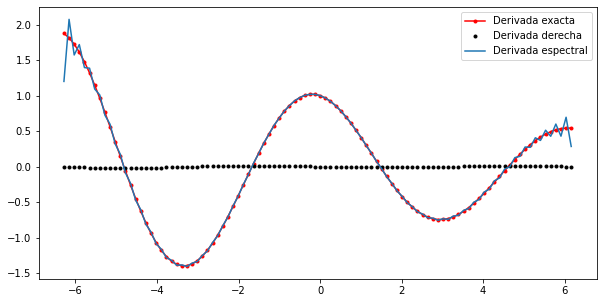

In [4]:
Npoints = 100
delta_h = 4*np.pi/100
x = np.arange(-2*np.pi, 2*np.pi, delta_h)
fig = plt.figure(figsize=(10,5))
plt.plot(x, fprime(x), '.-', c='r', label ='Derivada exacta')
plt.plot(x, fright(x), '.', c = 'k',  label ='Derivada derecha')
plt.plot(x, spectral(x), label ='Derivada espectral')
plt.legend()
